<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/Project/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at the data

In [1]:
#get data from server
!wget --no-check-certificate https://www.keuper-labs.org/project_ss22.zip

--2022-05-22 08:34:28--  https://www.keuper-labs.org/project_ss22.zip
Resolving www.keuper-labs.org (www.keuper-labs.org)... 91.250.118.129
Connecting to www.keuper-labs.org (www.keuper-labs.org)|91.250.118.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 70859177 (68M) [application/zip]
Saving to: ‘project_ss22.zip’

project_ss22.zip    100%[===================>]  67.58M  11.4MB/s    in 6.5s    

2022-05-22 08:34:34 (10.5 MB/s) - ‘project_ss22.zip’ saved [70859177/70859177]



In [2]:
#unpack
!unzip project_ss22.zip

Archive:  project_ss22.zip
   creating: dressipi_recsys2022/
  inflating: dressipi_recsys2022/candidate_items.csv  
  inflating: dressipi_recsys2022/item_features.csv  
  inflating: dressipi_recsys2022/test_leaderboard_sessions.csv  
  inflating: dressipi_recsys2022/test_final_sessions.csv  
  inflating: dressipi_recsys2022/README.txt  
  inflating: dressipi_recsys2022/train_purchases.csv  
  inflating: dressipi_recsys2022/train_sessions.csv  
  inflating: dressipi_recsys2022/README_win.txt  


In [3]:
#Importieren der nötigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Importieren und zuweisung der Daten
items = pd.read_csv('dressipi_recsys2022/candidate_items.csv')
features = pd.read_csv('dressipi_recsys2022/item_features.csv')
train_purchases = pd.read_csv('dressipi_recsys2022/train_purchases.csv')
train_sessions = pd.read_csv('dressipi_recsys2022/train_sessions.csv')
test_leaderboard_sessions = pd.read_csv('dressipi_recsys2022/test_leaderboard_sessions.csv')

## have a first look



---


Hier werden zunächst die Datensätze einmal ausgegebn, um einen Überblick 
zubekommen wie diese aufgebaut sind.
In dem items Datensatz sind die item ids, welche in bei den testsessions gekauft wurden 

In [5]:
items.head()

,item_id
0,4
1,8
2,9
3,19
4,20


In [6]:
#how many items do we have?
items.describe()

,item_id
count,4990.000000
mean,14007.035271
std,8218.231425
min,4.000000
25%,6833.500000
50%,14108.500000
75%,21200.000000
max,28137.000000




---


In dem features Dataset sind die entsprechenden item features der jeweiligen items aufgelistet. Dabei werden die feature Kategorien wie Farbe, Ausschnitt, etc mit einer value id z.B. grün beschrieben. Die einzelnen items haben mehrere Kategorien, welche die items beschreiben, siehe hier z.B. item 2 hat 13 feature Kategorien.

In [7]:
features.head(13)

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
5,2,29,123
6,2,16,38
7,2,50,76
8,2,61,462
9,2,53,6


In [44]:
features['feature_value_id'].max()

905

In [54]:
bin(10|12<<12)

'0b1100000000001010'

In [43]:
features.groupby('item_id')

In [72]:
a = features.drop(['feature_value_id'],axis=1)
if a[a['item_id']== 10].duplicated().sum() > 0:
  print(10)

10


In [73]:
#item id mit doppelten feature_category_ids
for i in a['item_id'].unique():
  if a[a['item_id']== i].duplicated().sum() > 0:
    print(i)

10
11
18
30
35
38
43
49
52
55
58
64
65
88
90
97
100
101
112
118
135
137
140
149
158
160
162
170
173
180
182
184
193
196
197
204
206
209
211
214
253
269
290
292
294
297
305
317
318
319
323
335
336
352
368
382
388
390
391
392
396
399
408
410
412
416
417
424
429
430
432
437
439
455
460
467
469
480
481
482
495
506
511
516
522
526
543
544
545
553
559
562
563
568
575
580
586
588
590
611
620
631
638
641
647
653
662
664
668
674
676
689
691
695
699
700
706
707
711
715
725
726
733
739
740
742
747
749
753
759
763
766
768
771
776
782
794
801
809
810
846
848
852
853
857
859
860
862
864
867
877
889
908
916
928
930
931
933
934
939
949
957
959
960
963
971
977
989
1008
1017
1033
1039
1047
1057
1067
1068
1072
1078
1085
1114
1115
1132
1134
1138
1150
1151
1162
1164
1165
1174
1178
1201
1203
1225
1230
1239
1242
1243
1252
1268
1270
1287
1289
1290
1292
1302
1309
1310
1311
1313
1319
1320
1321
1323
1342
1343
1345
1349
1359
1362
1363
1374
1379
1384
1394
1399
1404
1408
1420
1421
1424
1426
1428
1435
1443
1446
1448

In [76]:
features[features['item_id'] == 28135]

,item_id,feature_category_id,feature_value_id
471588,28135,56,365
471589,28135,61,706
471590,28135,30,564
471591,28135,72,75
471592,28135,50,901
471593,28135,30,478
471594,28135,53,444
471595,28135,60,243
471596,28135,24,588
471597,28135,30,482


In [89]:
for i in a['feature_category_id'].unique():
  if a[a['item_id']== i].duplicated().sum() > 0:
    print(i)

11
55
65
18
30
49
38
58
52
35
43
10
64


In [93]:
a[a['feature_category_id'] == 65].head()

,item_id,feature_category_id
34,3,65
45,4,65
90,8,65
119,9,65
216,16,65


In [18]:
a.pivot(index='item_id',columns='feature_category_id')

ValueError: ignored

In [ ]:
g =list()

In [ ]:
for i in range(10):#features['feature_category_id']:
 g[:,i] = features[features['feature_category_id'] == i]['item_id'].duplicated()

KeyError: ignored

In [ ]:
g

4381      False
6538      False
7120      False
20276     False
20586     False
          ...  
446861    False
449761    False
451548    False
452294    False
459114    False
Name: item_id, Length: 137, dtype: bool

In [ ]:
features['feature_category_id'].duplicated().sum()

471678

In [ ]:
features.groupby('item_id').cumcount()

0          0
1          1
2          2
3          3
4          4
          ..
471746    12
471747    13
471748    14
471749    15
471750    16
Length: 471751, dtype: int64

In [ ]:
features[features['item_id'] == 28143]

,item_id,feature_category_id,feature_value_id
471734,28143,56,365
471735,28143,19,765
471736,28143,34,275
471737,28143,26,268
471738,28143,32,286
471739,28143,18,817
471740,28143,69,499
471741,28143,59,180
471742,28143,7,798
471743,28143,50,708


In [ ]:
f = features.drop(['feature_value_id'], axis = 1)

In [ ]:
f = f.set_index('item_id')

In [ ]:
f.groupby('item_id').cumcount()

item_id
2         0
2         1
2         2
2         3
2         4
         ..
28143    12
28143    13
28143    14
28143    15
28143    16
Length: 471751, dtype: int64

In [ ]:
features.pivot(index='item_id',columns='feature_category_id')

ValueError: ignored

In [ ]:
dup = features.duplicated()

In [ ]:
dup.value_counts()

False    471751
dtype: int64

because there are some duplicated indexes, the mean index was used to generate the mean value of the feature value ids

In [ ]:
features.pivot_table(index='item_id',columns='feature_category_id',  fill_value=0)

feature_value_id                                        \
feature_category_id               1   2    3      4    5  6    7  8  9  10   
item_id                                                                      
2                                  0   0    0    0.0    0  0  394  0  0  0   
3                                  0   0  889  618.0  605  0  452  0  0  0   
4                                  0   0  793  618.0  605  0  837  0  0  0   
7                                  0   0    0    0.0    0  0  536  0  0  0   
8                                  0   0  793  618.0  605  0  798  0  0  0   
...                              ...  ..  ...    ...  ... ..  ... .. .. ..   
28139                              0   0  793  618.0  605  0  798  0  0  0   
28140                              0  53    0    0.0    0  0    0  0  0  0   
28141                            461   0  889  719.0  605  0    2  0  0  0   
28142                              0   0    0    0.0    0  0  619  0  0  0   
28143                              0   0    0    0.0    0  0  798  0  0  0   

                     ...                                               
feature_category_id  ...  64   65 66   67   68   69 70   71   72   73  
item_id              ...                                               
2                    ...   0    0  0    0  351  885  0    0   75    0  
3                    ...   0  521  0    0   14  592  0    0   75  544  
4                    ...   0  521  0    0  373  538  0    0   75  544  
7                    ...   0    0  0    0  739  592  0    0   75    0  
8                    ...   0  521  0    0  351  592  0    0   75  544  
...                  ...  ..  ... ..  ...  ...  ... ..  ...  ...  ...  
28139                ...   0  521  0    0  106  805  0    0   75  544  
28140                ...  80    0  0  349  351    0  0  226    0  544  
28141                ...   0    0  0    0  379  499  0    0   75  544  
28142                ...   0  610  0    0  895  740  0    0   75   91  
28143                ...   0    0  0    0  351  499  0    0  371   91  

[23691 rows x 73 columns]

In [ ]:
features["item_id"].describe()

count    471751.000000
mean      14058.539477
std        8107.465455
min           2.000000
25%        7060.000000
50%       14045.000000
75%       21063.000000
max       28143.000000
Name: item_id, dtype: float64



---


Der Train_purchases Datensatz beinhaltet eine item id, welche am Ende der jeweiligen session letzlich gekauft wurde. Zusätzlich gibt es dabei noch einen Zeitstempel.
Die gesamten Daten wurden in einem Zeitraum von 18 Monaten aufgezeichnet, dabei wurden Daten der ersten 17 Monate für den Trainingsdatensatz verwendet und der letzte Monat wurde für den Testdatensatz verwendet.

In [ ]:
train_purchases.head()

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114




---


In dem Datensatz train_session sind die item ids aufgelistet, welche innerhalb einer session angesehen wurden. Auch hier gibt es jeweils einen Zeitstempel.

In [ ]:
train_sessions.head()

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211




---


Auf den Daten des Datensatzes test_leaderboard_session sollen die Vorhersagen für die Bestenliste des Wettbewerbs getätigt werden. 

In [ ]:
test_leaderboard_sessions

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
...,...,...,...
229349,4439653,25955,2021-06-11 10:22:57.47
229350,4439653,12179,2021-06-11 10:23:00.663
229351,4439757,2078,2021-06-30 11:42:15.073
229352,4439757,2078,2021-06-30 11:43:13.725


In [ ]:
test_sessions= pd.DataFrame(columns=['session_id']);

In [ ]:
test_sessions['session_id'] = test_leaderboard_sessions['session_id'].sort_values().unique()

In [ ]:
test_sessions

,session_id
0,26
1,200
2,205
3,495
4,521
...,...
49995,4439446
49996,4439458
49997,4439550
49998,4439653


# Erstellen eines Testscores mit zufälligen ergebnissen

Erstellen eines Zufälligen Testscores mit je 100 zufälligen Item ids pro Session. Die item ids werden hierfür aus der items liste entnommen.

In [ ]:
test = pd.DataFrame();

In [ ]:
test['session_id'] = test_leaderboard_sessions['session_id'].unique()
test  = test.loc[test.index.repeat(100)].reset_index(drop=True)
test['item_id'] = pd.DataFrame(np.random.randint(items['item_id'].min(), items['item_id'].max(), size=(len(test),1)))
test['rank'] = test.groupby('session_id').cumcount()+1
test = test.set_index('session_id')


In [ ]:
test.head(102)

,item_id,rank
session_id,,
26,10241,1
26,3187,2
26,14013,3
26,2881,4
26,233,5
...,...,...
26,6912,98
26,7821,99
26,27223,100


In [ ]:
test.to_csv('test.csv')

### Lets take a closer look to the test_leaderboard_seesions

In [ ]:
# first count the ammount of the session numbers
A = pd.DataFrame(test_leaderboard_sessions['session_id'].value_counts().sort_values())['session_id'].value_counts()

In [ ]:
A.to_frame()

,session_id
1,17036
2,7994
3,5444
4,3766
5,2844
...,...
60,1
61,1
55,1
53,1


In [ ]:
# lets use the describe function for better analysing of the numbers 
test_leaderboard_sessions['session_id'].value_counts().sort_values().describe()

count    50000.000000
mean         4.587080
std          5.666023
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         72.000000
Name: session_id, dtype: float64

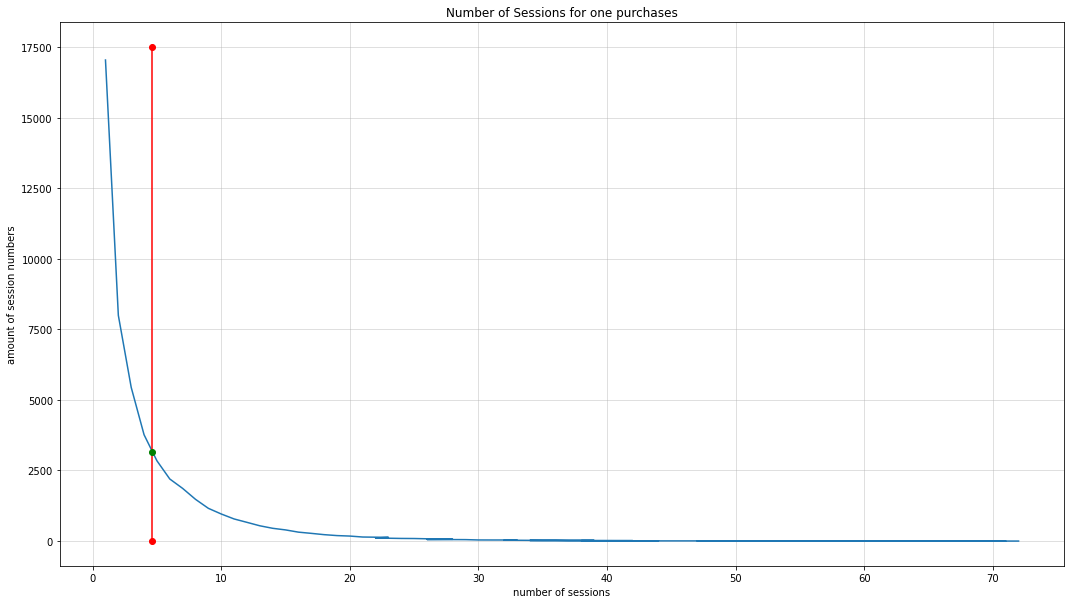

In [ ]:

# print the generated curve of the session ammounts
fig, axes = plt.subplots(figsize=(18,10))

axes.plot(A)
axes.plot([4.58708,4.58708], [0,17500], '-ro', label='line & marker')
axes.plot(4.58708,3150, 'go', label='marker only')
axes.set_xlabel('number of sessions')
axes.set_ylabel('amount of session numbers')
axes.set_title('Number of Sessions for one purchases');
axes.grid(alpha=0.5)

Da in den meisten sessions nur ein item angesehen wird, werden als nächstes die ids vorgeschlagen, wechle zuletzt in der Session angesehen wurden.

In [ ]:
test2 = pd.DataFrame();

In [ ]:
#test2['session_id'] = test_leaderboard_sessions['session_id'].unique();
idx = test_leaderboard_sessions.groupby(['session_id'])['date'].transform(max) == test_leaderboard_sessions['date']

In [ ]:
test2 = test_leaderboard_sessions[idx]

In [ ]:
test2 = test2.reset_index()

In [ ]:
test2['session_id']

0             26
1            200
2            205
3            495
4            521
          ...   
50001    4439446
50002    4439458
50003    4439550
50004    4439653
50005    4439757
Name: session_id, Length: 50006, dtype: int64

In [ ]:
test_leaderboard_sessions.head(20)

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
5,205,8194,2021-06-11 00:28:07.058
6,495,6853,2021-06-14 22:13:06.741
7,521,26471,2021-06-19 13:50:03.09
8,587,22204,2021-06-01 16:43:22.80
9,721,13914,2021-06-19 18:46:57.263


In [ ]:
a = test2['session_id'].duplicated() == test2['session_id']

In [ ]:
a

0        False
1        False
2        False
3        False
4        False
         ...  
50001    False
50002    False
50003    False
50004    False
50005    False
Name: session_id, Length: 50006, dtype: bool

In [ ]:
test3  = pd.DataFrame()

In [ ]:
test3['session_id'] = test_leaderboard_sessions['session_id'].unique()
test3['item_id'] = test2['item_id']
test3['rank'] = 1
test3 = test3.set_index('session_id')

In [ ]:
test3

,item_id,rank
session_id,,
26,19185,1
200,4758,1
205,8194,1
495,6853,1
521,26471,1
...,...,...
4439446,26054,1
4439458,7664,1
4439550,23038,1


In [ ]:
test3.to_csv('test3.csv')

In [ ]:
d = pd.DataFrame(np.zeros((4,4)))
d = d.astype('object')
d[1][0] = [1,2]
d

,0,1,2,3
0,0.0,"[1, 2]",0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [ ]:
dd = features.astype('object')
dd['feature_value_id'][2] = [1,2,3]
dd

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,"[1, 2, 3]"
3,2,33,802
4,2,72,75
...,...,...,...
471746,28143,68,351
471747,28143,55,390
471748,28143,11,109
471749,28143,73,91


In [ ]:
dd.pivot_table(index='item_id',columns='feature_category_id',  fill_value=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


item_id
2
3
4
7
8
...
28139
28140
28141
28142


In [ ]:
ddd

item_id
2
3
4
7
8
...
28139
28140
28141
28142
